# **Netflix Movies and TV Shows**
**Complete Exploratory Data Analysis**

## 📊 About the Dataset

**Description:**  
The dataset was sourced from Kaggle, containing information about movies and TV shows available on Netflix. You can find the dataset at the following link:  
[Netflix Movies and TV Shows Dataset on Kaggle](https://www.kaggle.com/datasets/anandshaw2001/netflix-movies-and-tv-shows)

**Context:**  
Streaming platforms like Netflix have become a major part of our entertainment consumption. With an ever-growing library of content, this dataset provides an opportunity to explore trends, content types, and regional availability across the platform. It is ideal for those interested in understanding the composition of Netflix's content or conducting exploratory data analysis (EDA).

**Content:**  
Each record (row) represents a unique title available on Netflix and includes details such as:
- Type (Movie or TV Show)
- Title
- Director
- Cast
- Country
- Date added
- Release year
- Rating
- Duration
- Genre
- Description

**Acknowledgements:**  
The data was collected from Netflix via Kaggle and is made available for academic and exploratory purposes. Full credit to the original contributors for scraping and compiling this dataset.

**Inspiration:**  
This dataset opens the door to several interesting questions, such as:
- What type of content does Netflix offer the most?
- Which countries dominate the Netflix catalog?
- How has the distribution of content changed over time?

By analyzing this data, content creators, marketers, and data enthusiasts can uncover valuable insights into the world of digital streaming.


# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Load the data**

In [2]:
# load the dataset
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Data Cleaning and Preprocessing**

In [3]:
print(f'The columns of the dataset are: {df.columns}')

The columns of the dataset are: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [4]:
print(f'Total rows in the datasets are: {df.shape[0]}')

Total rows in the datasets are: 8807


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

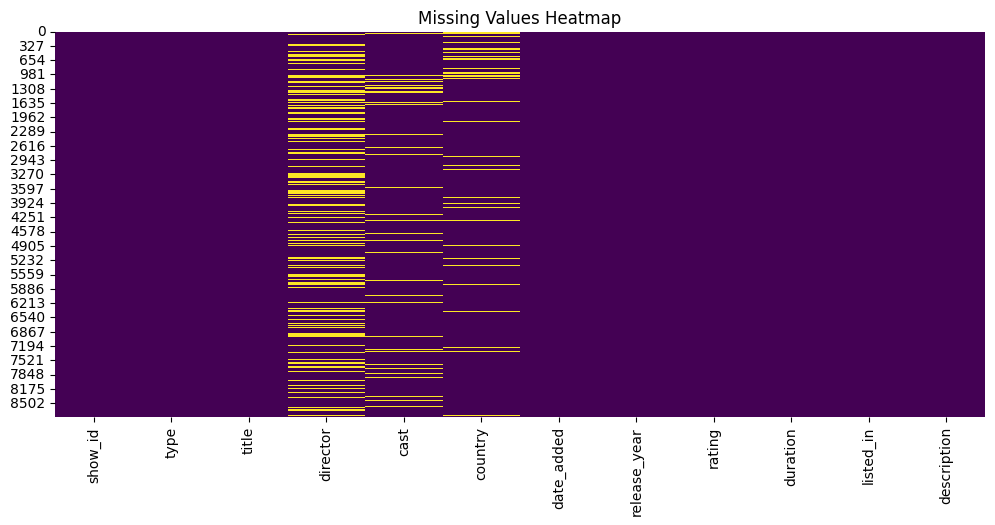

In [8]:
# visualizing missing values using heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
# dropping the column of cast and description
df.drop(columns=['cast'], inplace=True)
df.drop(columns=['description'], inplace=True)

In [10]:
# write all the values of rating
ratings = df['rating'].unique()
ratings

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [11]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [12]:
# This function simplifies the 'rating' column into broader categories for easier analysis.
# It maps specific ratings to general categories such as 'Everyone', '10+', '13+', '17+', '18+', 'Unrated', or 'Unknown'.
# This helps in grouping similar ratings together and provides a more concise view of the data.
def simplify_rating(r):
    if r in ['G', 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV']:
        return 'Everyone'
    elif r in ['PG', 'TV-PG']:
        return '10+'
    elif r in ['PG-13', 'TV-14']:
        return '13+'
    elif r in ['R', 'TV-MA']:
        return '17+'
    elif r in ['NC-17']:
        return '18+'
    elif r in ['NR', 'UR']:
        return 'Unrated'
    else:
        return 'Unknown'



In [13]:
# Apply the function to your dataframe
df['categorize_rating'] = df['rating'].apply(simplify_rating)

In [14]:
df['categorize_rating'].value_counts()

categorize_rating
17+         4006
13+         2650
10+         1150
Everyone     908
Unrated       83
Unknown        7
18+            3
Name: count, dtype: int64

In [15]:
# filling missing values of rating with mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
# check for missing values again
df['rating'].isnull().sum()

0

In [16]:
# remove missing values of duration
df.dropna(subset=['duration'], inplace=True)

# check for missing values only in duration
df['duration'].isnull().sum()

0

In [17]:
# removing the rows with missing values in date added
df.dropna(subset=['date_added'], inplace=True)

# check for missing values only in date added
df['date_added'].isnull().sum()

# now converting date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')


In [18]:
# filling missing values of country with 'Unknown'
df['country'].fillna('Unknown', inplace=True)
# check for missing values again only in country
df['country'].isnull().sum()

0

In [19]:
# filling missing values of director with 'Unknown'
df['director'].fillna('Unkknown', inplace=True)
# check for missing values again only in director
df['director'].isnull().sum()

0

In [20]:
# creating a new column 'genre' by splitting the 'listed_in' column which helps us in visualizing the data and analyzing the data better
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)
# check the unique values of genre
df['genre'].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies'],
      dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8794 non-null   object        
 1   type               8794 non-null   object        
 2   title              8794 non-null   object        
 3   director           8794 non-null   object        
 4   country            8794 non-null   object        
 5   date_added         8706 non-null   datetime64[ns]
 6   release_year       8794 non-null   int64         
 7   rating             8794 non-null   object        
 8   duration           8794 non-null   object        
 9   listed_in          8794 non-null   object        
 10  categorize_rating  8794 non-null   object        
 11  genre              8794 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.1+ KB


In [22]:
total_seasons = df['duration'].str.contains('season', case=False, na=False).sum()
print("Total entries with 'season':", total_seasons)

# check for total values which contains "min" in duration column
mint = df['duration'].str.contains('min').sum()
print(f'Total number of movies in the dataset are: {mint}')

print(f'Total values in duration column are: {total_seasons + mint}')

Total entries with 'season': 2666
Total number of movies in the dataset are: 6128
Total values in duration column are: 8794


In [23]:
print(f'Remaining rows and columns in the dataset after cleaning the data: {df.shape}')

Remaining rows and columns in the dataset after cleaning the data: (8794, 12)


# **HANDLING OUTLIERS**

## First we will check the outliers in 'duration' column

In [24]:
# Step 1: Filter out only the shows (where 'season' is present in 'duration')
df_shows = df[df['duration'].str.contains('season', case=False, na=False)]

# Step 2: Check unique values
unique_season_values = df_shows['duration'].unique()

# Step 3: Print the result
print("Unique 'season' values in duration column:")
print(unique_season_values)

season_counts = df_shows['duration'].value_counts()

# Step 3: Print the result
print("Season-wise value counts:")
print(season_counts)

Unique 'season' values in duration column:
['2 Seasons' '1 Season' '9 Seasons' '4 Seasons' '5 Seasons' '3 Seasons'
 '6 Seasons' '7 Seasons' '10 Seasons' '8 Seasons' '17 Seasons'
 '13 Seasons' '15 Seasons' '12 Seasons' '11 Seasons']
Season-wise value counts:
duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64



### Outliers in Seasons
The `season` column does not contain any outliers. All values in this column are considered real and valid.


In [25]:
df_movies = df[df['duration'].str.contains('min', case=False, na=False)]

# check unique values in duration column
unique_durations = df_movies['duration'].unique()
print("Unique durations in movies:")
print(unique_durations)

Unique durations in movies:
['90 min' '91 min' '125 min' '104 min' '127 min' '67 min' '94 min'
 '161 min' '61 min' '166 min' '147 min' '103 min' '97 min' '106 min'
 '111 min' '110 min' '105 min' '96 min' '124 min' '116 min' '98 min'
 '23 min' '115 min' '122 min' '99 min' '88 min' '100 min' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '64 min' '59 min' '139 min' '69 min' '148 min' '189 min'
 '141 min' '130 min' '138 min' '81 min' '132 min' '123 min' '65 min'
 '68 min' '66 min' '62 min' '74 min' '131 min' '39 min' '46 min' '38 min'
 '126 min' '155 min' '159 min' '137 min' '12 min' '273 min' '36 min'


In [26]:
duration_counts = df_movies['duration'].value_counts().sort_values(ascending=True).head(10)
print("Duration value counts in movies:")
print(duration_counts)

Duration value counts in movies:
duration
191 min    1
214 min    1
9 min      1
273 min    1
43 min     1
200 min    1
196 min    1
167 min    1
178 min    1
228 min    1
Name: count, dtype: int64


In [27]:
# Step 1: Separate shows
df_shows = df[df['duration'].str.contains('season', case=False, na=False)].copy()

# Step 2: Keep shows as-is (no outlier removal needed)
df_shows_clean = df_shows.copy()

# Movies have 'min' in the duration
df_movies = df[df['duration'].str.contains('min', case=False, na=False)].copy()

# Step 2: Convert durations to numeric values
# For movies: extract number of minutes
df_movies['duration_min'] = df_movies['duration'].str.extract('(\d+)').astype(int)

In [28]:
    # applying IQR method to find outliers in movies
    Q1 = df_movies['duration_min'].quantile(0.25)
    Q3 = df_movies['duration_min'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound_mov = Q3 + (1.5 * IQR)
    lower_bound_mov = Q1 - (1.5 * IQR)
    # Filter out outliers
    outliers_movies = df_movies[(df_movies['duration_min'] < lower_bound_mov) | (df_movies['duration_min'] > upper_bound_mov)]
    # See how many outliers were found
    print("Total movie outliers found:", len(outliers_movies))


Total movie outliers found: 450


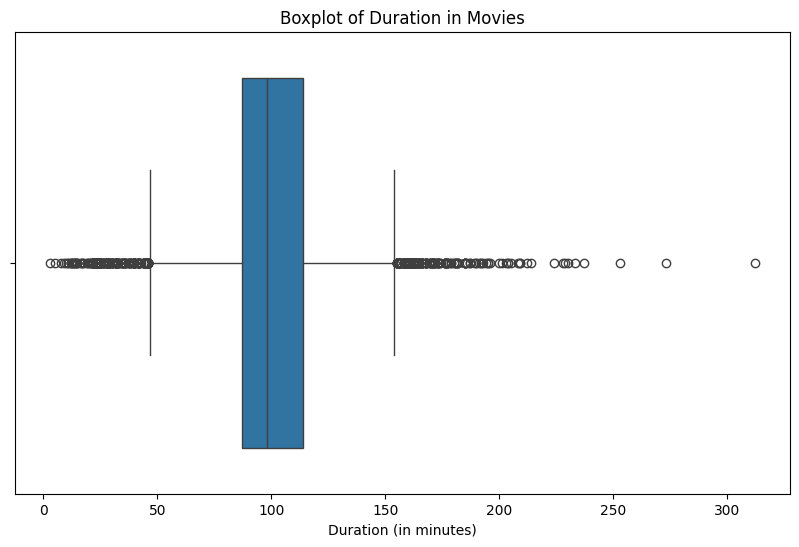

In [29]:
# creating boxplot to visualize outliers in movies
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration_min', data=df_movies)
plt.title('Boxplot of Duration in Movies')
plt.xlabel('Duration (in minutes)')
plt.show()

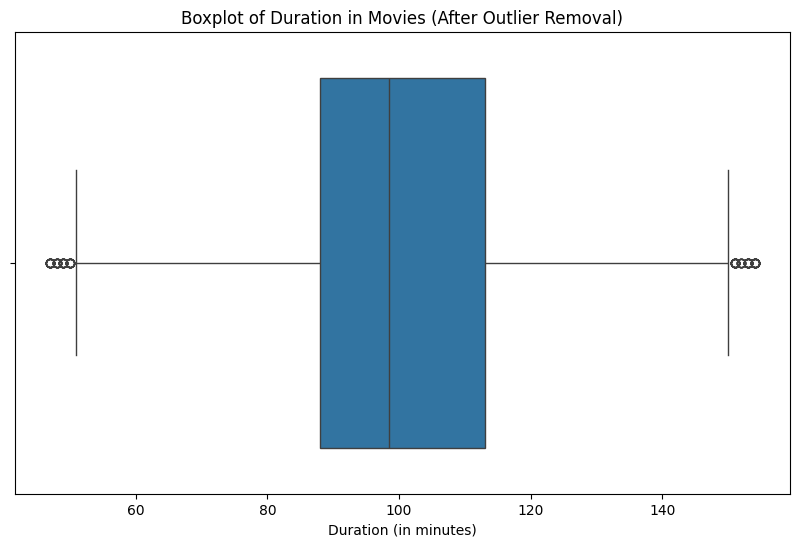

In [30]:
# remove outliers from the movies dataset
df_movies_clean = df_movies[
    (df_movies['duration_min'] > lower_bound_mov) & 
    (df_movies['duration_min'] < upper_bound_mov)
]

# creating boxplot after removing outliers in movies
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration_min', data=df_movies_clean)
plt.title('Boxplot of Duration in Movies (After Outlier Removal)')
plt.xlabel('Duration (in minutes)')
plt.show()


In [31]:
# Merge cleaned movies and shows back into one DataFrame
df_cleaned = pd.concat([df_movies_clean, df_shows_clean], ignore_index=True)

# Replace the original df (optional, if you want to keep only cleaned data)
df = df_cleaned.copy()


In [32]:
df.shape[0]

8344

## Now, we will check outliers in 'release_year' column

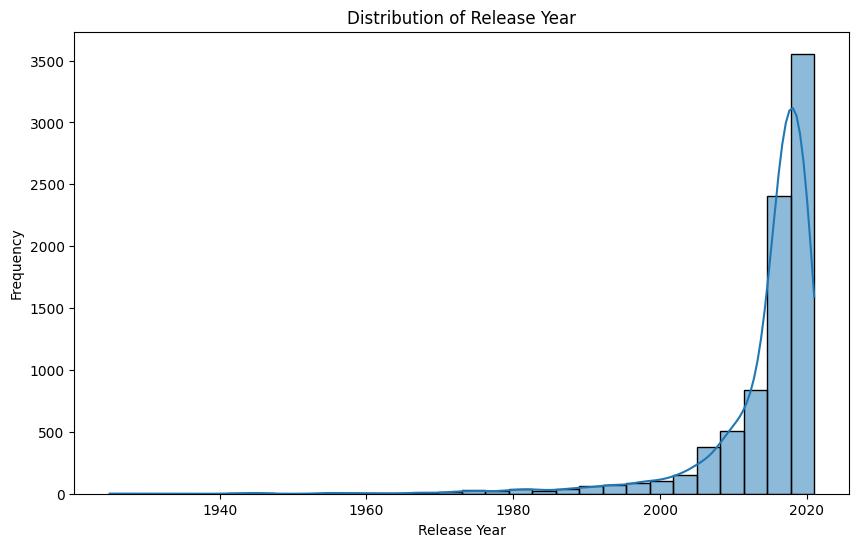

In [33]:
# creating histplot to visualize the distribution of release_year
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

### Validity of the `release_year` Column

The `release_year` column will be considered valid as it contains realistic and meaningful values that align with the context of the dataset. The data in this column represents the year of release for movies and TV shows, and no anomalies or unrealistic entries have been identified.

In [34]:
# total number of rows and columns in the dataset after removing outliers
print(f'Total number of rows and columns in the dataset after removing outliers: {df.shape}')

Total number of rows and columns in the dataset after removing outliers: (8344, 13)


# **Check For Duplicates**

In [35]:
# checking duplicates in the dataset
duplicate = df.duplicated().sum()
print(f'Total number of duplicate rows in the dataset: {duplicate}')

Total number of duplicate rows in the dataset: 0


In [36]:
# saving the cleaned dataset to a new CSV file
df.to_csv('netflix_titles_cleaned.csv', index=False)
print("Cleaned dataset saved as 'netflix_titles_cleaned.csv'")

Cleaned dataset saved as 'netflix_titles_cleaned.csv'




# **Data Visualization**


### 1. Distribution of Movies and Shows

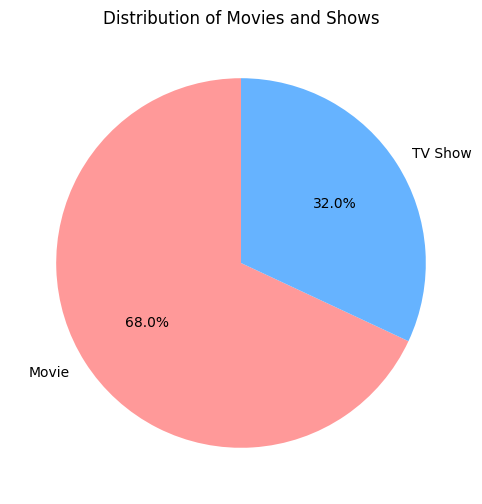

In [37]:
# Generating a pie chart to visualize the proportion of Movies and TV Shows in the dataset
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Movies and Shows')
plt.ylabel('')
plt.show()


### 2. Distribution of Movie Durations

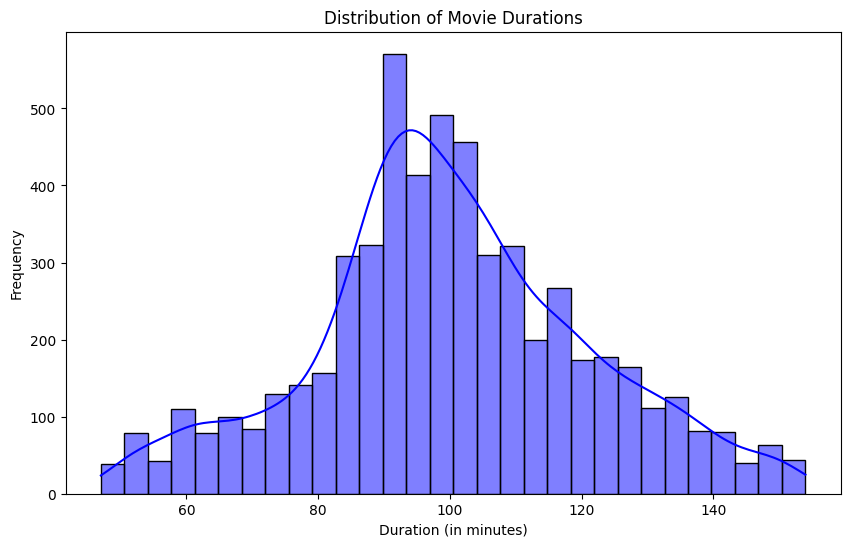

In [38]:
# Visualizing the distribution of movie durations using a histogram and KDE plot -->
plt.figure(figsize=(10, 6))
sns.histplot(df_movies_clean['duration_min'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Frequency')
plt.show()

### 3. Bar Chart of Ratings:

C:\Users\Dell\AppData\Local\Temp\ipykernel_16072\2985332618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='categorize_rating', order=df['categorize_rating'].value_counts().index, palette='viridis')


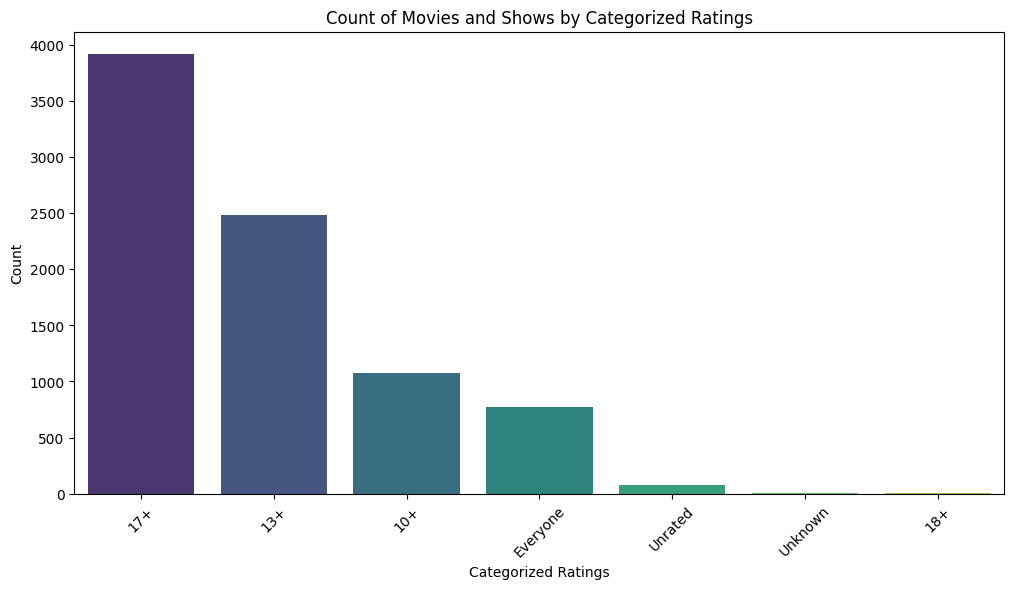

In [39]:
# Plotting the bar chart for categorized ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='categorize_rating', order=df['categorize_rating'].value_counts().index, palette='viridis')
plt.title('Count of Movies and Shows by Categorized Ratings')
plt.xlabel('Categorized Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 4. Content Added Over Time:

In [40]:
# Grouping by year and month of 'date_added' and counting the number of entries
df['year_month_added'] = df['date_added'].dt.to_period('M')
content_added_over_time = df.groupby('year_month_added').size()

# Plotting the data using Plotly
import plotly.express as px

fig = px.line(content_added_over_time, 
              x=content_added_over_time.index.astype(str), 
              y=content_added_over_time.values, 
              markers=True, 
              title='Content Added Over Time')

fig.update_layout(
    xaxis_title='Year-Month',
    yaxis_title='Number of Movies and TV Shows Added',
    xaxis=dict(tickangle=45),
    template='plotly_white'
)

fig.show()

### 5. Top Genres:

C:\Users\Dell\AppData\Local\Temp\ipykernel_16072\196522193.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




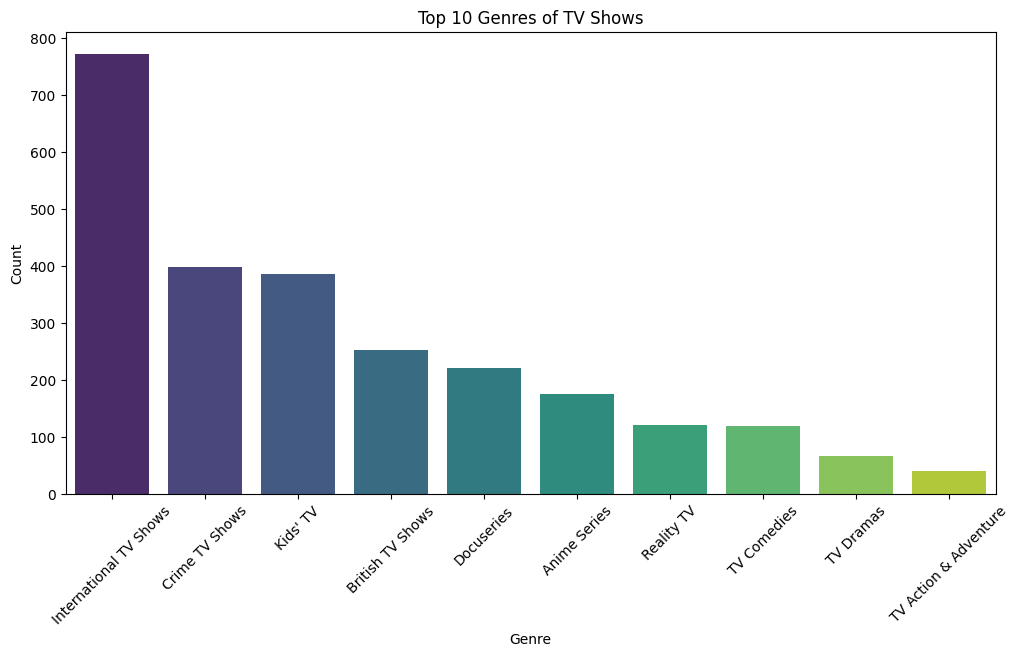

In [41]:
# Filter the dataset for shows only
shows_genre_counts = df[df['type'] == 'TV Show']['genre'].value_counts().head(10)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=shows_genre_counts.index, y=shows_genre_counts.values, palette='viridis')
plt.title('Top 10 Genres of TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_16072\1777637079.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




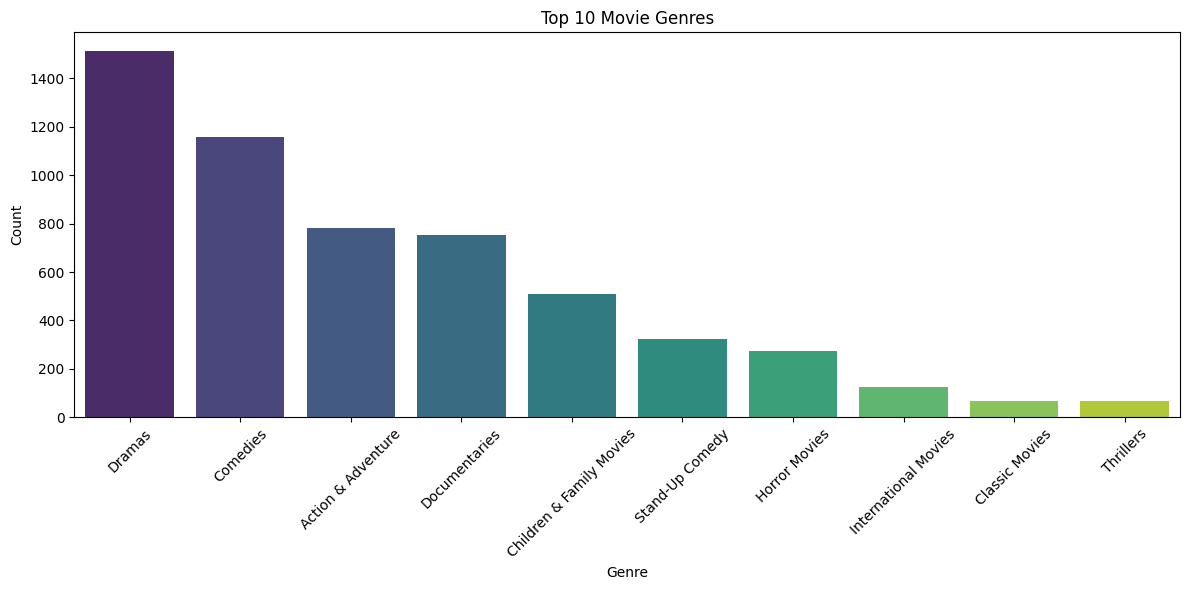

In [42]:
# Filter the dataset for movies only
movies_genre_counts = df[df['type'] == 'Movie']['genre'].value_counts().head(10)

# Create a bar plot for the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_genre_counts.index, y=movies_genre_counts.values, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Season Counts for TV Shows:

In [43]:
# Creating a bar chart for season counts
fig = px.bar(
    x=season_counts.index,
    y=season_counts.values,
    labels={'x': 'Number of Seasons', 'y': 'Count'},
    title='Distribution of Season Counts for TV Shows',
    text=season_counts.values
)

# Updating layout for better visualization
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis=dict(tickangle=45),
    template='plotly_white',
    height=500  
)

fig.show()

### 7. Top Countries With Most Content:

C:\Users\Dell\AppData\Local\Temp\ipykernel_16072\3886193401.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




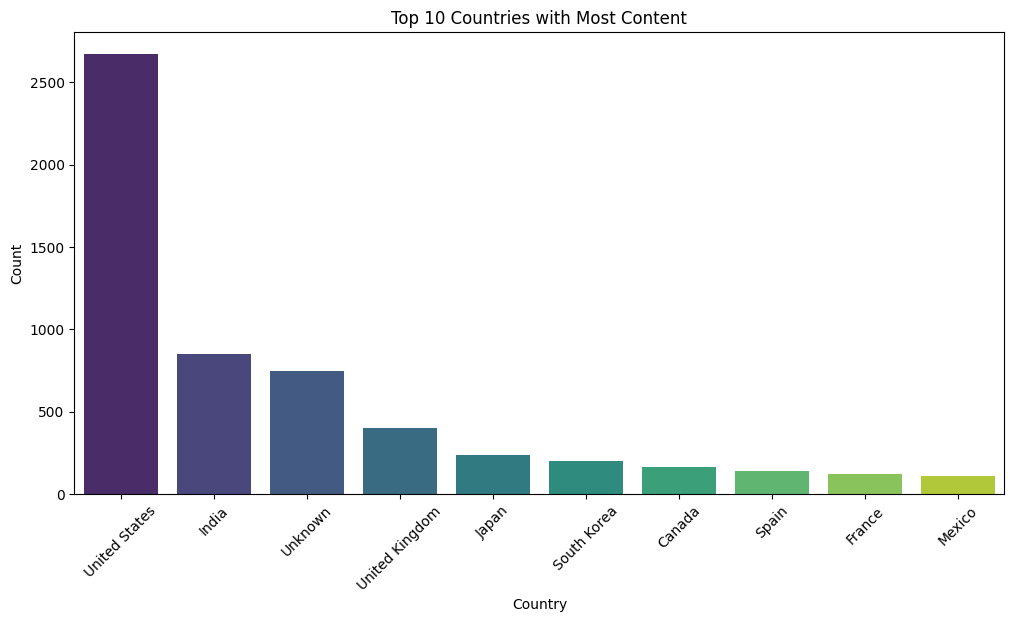

In [44]:
# creating bar plot of top 10 countries with most content
top_10_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# **Conclusion**

This project provided an in-depth analysis of the Netflix dataset, focusing on cleaning, exploring, and visualizing the data to uncover meaningful insights. The dataset contained information about movies and TV shows, including attributes such as title, director, country, release year, rating, and duration. Through systematic data preprocessing, missing values were handled, irrelevant columns were dropped, and outliers were identified and removed to ensure the dataset's quality and reliability.

The analysis revealed interesting trends and patterns. For instance, the distribution of content types showed a higher proportion of movies compared to TV shows. The duration of movies was analyzed, and outliers were removed using the IQR method to focus on realistic values. Similarly, the release year column was validated, confirming that it contained meaningful and realistic data. The dataset also highlighted the diversity of content, with genres like "International Movies," "Dramas," and "Comedies" being the most prevalent. Additionally, the top countries contributing to Netflix's content were identified, with the United States leading, followed by India and the United Kingdom.

Visualizations played a crucial role in understanding the data. Pie charts, bar plots, and histograms were used to illustrate the distribution of content types, durations, ratings, and genres. Time-series analysis showed the trend of content being added over the years, providing insights into Netflix's growth and expansion. The project also explored the distribution of seasons for TV shows, confirming the absence of outliers in this category.

Overall, this project demonstrated the importance of data cleaning, exploration, and visualization in deriving actionable insights from a dataset. By addressing missing values, handling outliers, and leveraging visualizations, we were able to uncover trends and patterns that provide a deeper understanding of Netflix's content library. This analysis can serve as a foundation for further studies, such as predicting user preferences or optimizing content recommendations.



## 👤 **About the Author**

**Mughees Saleem**  
📍 *Karachi, Pakistan*  

Data Analyst | Data Scientist Enthusiast  

<div align="center">
  <a href="mailto:mughees_saleem@outlook.com" target="_blank">
    <img src="https://img.shields.io/badge/Email-D14836?style=for-the-badge&logo=gmail&logoColor=white" alt="Email"/>
  </a>
  <a href="https://www.linkedin.com/in/mughees-saleem-/" target="_blank">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn"/>
  </a>
  <a href="https://github.com/Mughees2005" target="_blank">
    <img src="https://img.shields.io/badge/GitHub-333?style=for-the-badge&logo=github&logoColor=white" alt="GitHub"/>
  </a>
  <a href="https://www.kaggle.com/mugheessaleem" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle"/>
  </a>
</div>


<div style="text-align: center;">
  <strong style="font-size: 22px;">🙏 Thank You for Viewing My Project!</strong>
</div>
